In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Retrieval Analysis

In [7]:


# Step 1: Read the CSV file and load specific columns
columns_to_read = [
    'question', 'document_id', 'hit_rate_text', 'hit_rate_vector', 
    'hit_rate_vector_combined', 'mrr_text', 'mrr_vector', 'mrr_vector_combined'
]

# Read the CSV file
df = pd.read_csv('ground_truth_metrics_retrieval.csv', usecols=columns_to_read, sep=";")

In [8]:
# Step 2: Calculate the averages (or other metrics) for hit_rate and mrr columns
hit_rate_columns = ['hit_rate_text', 'hit_rate_vector', 'hit_rate_vector_combined']
mrr_columns = ['mrr_text', 'mrr_vector', 'mrr_vector_combined']

# Calculate mean, median, and standard deviation for hit rates
hit_rate_stats = df[hit_rate_columns].describe()
mrr_stats = df[mrr_columns].describe()

# Print calculated statistics
print("Hit Rate Statistics:")
print(hit_rate_stats)

print("\nMRR Statistics:")
print(mrr_stats)

Hit Rate Statistics:
       hit_rate_text  hit_rate_vector  hit_rate_vector_combined
count    4505.000000      4505.000000               4505.000000
mean        0.392675         0.078135                  0.011099
std         0.488400         0.268414                  0.104776
min         0.000000         0.000000                  0.000000
25%         0.000000         0.000000                  0.000000
50%         0.000000         0.000000                  0.000000
75%         1.000000         0.000000                  0.000000
max         1.000000         1.000000                  1.000000

MRR Statistics:
          mrr_text   mrr_vector  mrr_vector_combined
count  4505.000000  4505.000000          4505.000000
mean      0.211015     0.033123             0.003251
std       0.347560     0.147779             0.041351
min       0.000000     0.000000             0.000000
25%       0.000000     0.000000             0.000000
50%       0.000000     0.000000             0.000000
75%       0.250

In [9]:
# Step 3: Making Conclusions
print("\nConclusions:")
for column in hit_rate_columns:
    avg_value = df[column].mean()
    print(f"The average {column} is {avg_value:.2f}. Higher values indicate better retrieval performance.")

for column in mrr_columns:
    avg_value = df[column].mean()
    print(f"The average {column} is {avg_value:.2f}. Higher values indicate better mean reciprocal rank performance.")


Conclusions:
The average hit_rate_text is 0.39. Higher values indicate better retrieval performance.
The average hit_rate_vector is 0.08. Higher values indicate better retrieval performance.
The average hit_rate_vector_combined is 0.01. Higher values indicate better retrieval performance.
The average mrr_text is 0.21. Higher values indicate better mean reciprocal rank performance.
The average mrr_vector is 0.03. Higher values indicate better mean reciprocal rank performance.
The average mrr_vector_combined is 0.00. Higher values indicate better mean reciprocal rank performance.


In [12]:
# Step 4: Additional Analysis
# Correlation analysis to see how hit rates and MRRs relate to each other
correlation_matrix = df[hit_rate_columns + mrr_columns].corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,hit_rate_text,hit_rate_vector,hit_rate_vector_combined,mrr_text,mrr_vector,mrr_vector_combined
hit_rate_text,1.000000,0.114792,-0.020105,0.755139,0.107063,-0.016258
hit_rate_vector,0.114792,1.000000,0.048104,0.114239,0.769966,0.034788
hit_rate_vector_combined,-0.020105,0.048104,1.000000,-0.017357,0.055596,0.742157
mrr_text,0.755139,0.114239,-0.017357,1.000000,0.122870,-0.011977
mrr_vector,0.107063,0.769966,0.055596,0.122870,1.000000,0.037481
mrr_vector_combined,-0.016258,0.034788,0.742157,-0.011977,0.037481,1.000000


# RAG Analysis

In [14]:
# Step 1: Read the CSV file with specific separator and columns
columns_to_read = [
    'number', 'question', 'answer', 'sanitized_question', 'document_id', 
    'answer_original', 'answer_llm', 'cosine_similarity', 'vector_original', 
    'vector_llm', 'relevance_1', 'explanation_1', 'relevance_2', 'explanation_2'
]

df = pd.read_csv('df_judge_1_2.csv', sep=';', usecols=columns_to_read)

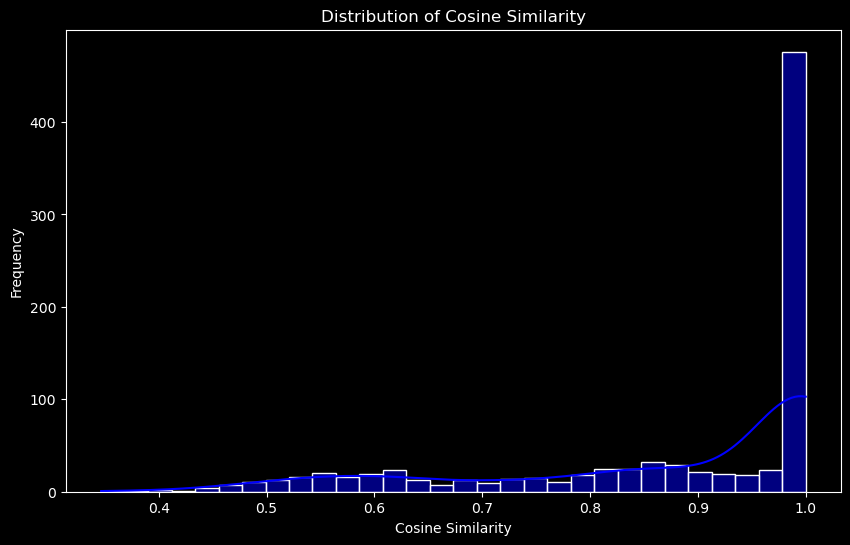

In [15]:
# Step 2: Analyze cosine_similarity - Plot distribution and describe analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['cosine_similarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

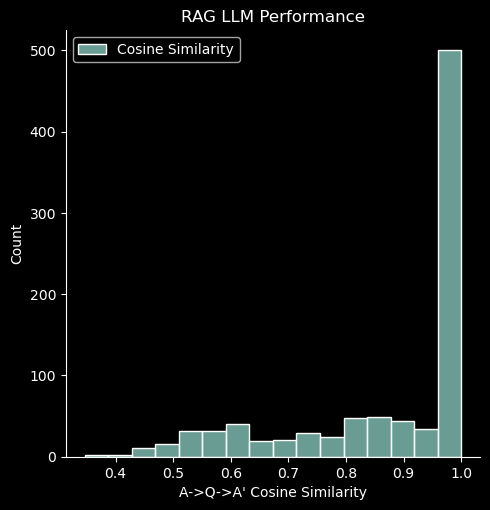

In [26]:
sns.displot(df['cosine_similarity'], label='Cosine Similarity')
plt.title("RAG LLM Performance")
plt.xlabel("A->Q->A' Cosine Similarity")
plt.legend()
plt.show()

In [18]:
# Descriptive analysis for cosine_similarity
print("Descriptive Statistics for Cosine Similarity:")
df['cosine_similarity'].describe()

Descriptive Statistics for Cosine Similarity:


count    902.000000
mean       0.877508
std        0.167155
min        0.346501
25%        0.795372
50%        0.991802
75%        1.000000
max        1.000000
Name: cosine_similarity, dtype: float64

In [20]:
# Conclusion for Cosine Similarity Analysis
cosine_desc = df['cosine_similarity'].describe()

print("\nConclusion:")
print(f"The cosine similarity ranges from {cosine_desc['min']:.2f} to {cosine_desc['max']:.2f} with a mean of {cosine_desc['mean']:.2f}.")
print("Higher values of cosine similarity indicate that the answer is more similar to the original document. The distribution shows how closely the generated answers match the reference texts.")


Conclusion:
The cosine similarity ranges from 0.35 to 1.00 with a mean of 0.88.
Higher values of cosine similarity indicate that the answer is more similar to the original document. The distribution shows how closely the generated answers match the reference texts.


In [ ]:
# Step 3: Analyze relevance_1 and relevance_2 - Plot distribution and describe analysis
plt.figure(figsize=(12, 6))

# Plot for relevance_1
plt.subplot(1, 2, 1)
sns.countplot(x='relevance_1', data=df, order=['NON_RELEVANT', 'PARTLY_RELEVANT', 'RELEVANT'], palette='Set2')
plt.title('Distribution of Relevance 1')
plt.xlabel('Relevance 1')
plt.ylabel('Frequency')

# Plot for relevance_2
plt.subplot(1, 2, 2)
sns.countplot(x='relevance_2', data=df, order=['NON_RELEVANT', 'PARTLY_RELEVANT', 'RELEVANT'], palette='Set3')
plt.title('Distribution of Relevance 2')
plt.xlabel('Relevance 2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


/var/folders/bw/xn7fzq7s19345glv1sllmzdc0000gn/T/ipykernel_36190/2395708113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='relevance_1', data=df, order=['NON_RELEVANT', 'PARTLY_RELEVANT', 'RELEVANT'], palette='Set2')
/var/folders/bw/xn7fzq7s19345glv1sllmzdc0000gn/T/ipykernel_36190/2395708113.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='relevance_2', data=df, order=['NON_RELEVANT', 'PARTLY_RELEVANT', 'RELEVANT'], palette='Set3')


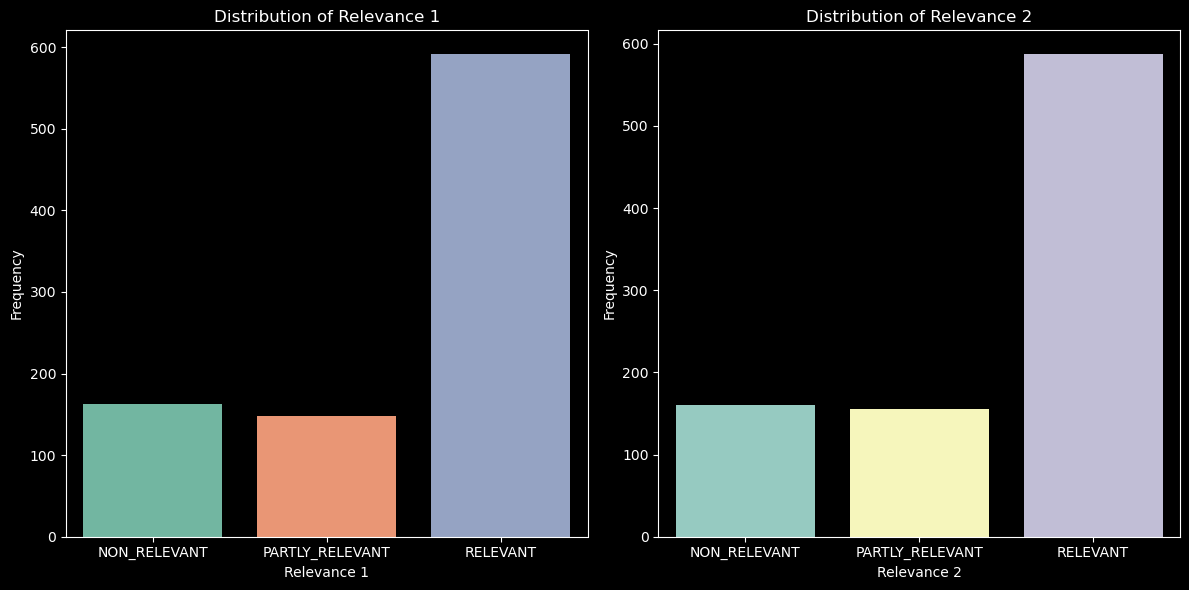

In [23]:
# Step 3: Analyze relevance_1 and relevance_2 - Plot distribution and describe analysis
plt.figure(figsize=(12, 6))

# Plot for relevance_1
plt.subplot(1, 2, 1)
sns.countplot(x='relevance_1', data=df, order=['NON_RELEVANT', 'PARTLY_RELEVANT', 'RELEVANT'], palette='Set2')
plt.title('Distribution of Relevance 1')
plt.xlabel('Relevance 1')
plt.ylabel('Frequency')

# Plot for relevance_2
plt.subplot(1, 2, 2)
sns.countplot(x='relevance_2', data=df, order=['NON_RELEVANT', 'PARTLY_RELEVANT', 'RELEVANT'], palette='Set3')
plt.title('Distribution of Relevance 2')
plt.xlabel('Relevance 2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [27]:
# Descriptive analysis for relevance_1 and relevance_2
relevance_1_counts = df['relevance_1'].value_counts()
relevance_2_counts = df['relevance_2'].value_counts()

print("\nFrequency Distribution for Relevance 1:")
print(relevance_1_counts)

print("\nFrequency Distribution for Relevance 2:")
print(relevance_2_counts)


Frequency Distribution for Relevance 1:
relevance_1
RELEVANT           591
NON_RELEVANT       163
PARTLY_RELEVANT    148
Name: count, dtype: int64

Frequency Distribution for Relevance 2:
relevance_2
RELEVANT           587
NON_RELEVANT       160
PARTLY_RELEVANT    155
Name: count, dtype: int64
